In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from Models.LogisticRegressionWith1NN import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("./Dataset/6.final_df.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964348 entries, 0 to 964347
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Week                  964348 non-null  int64  
 1   SalesUnitWeek         964348 non-null  int64  
 2   SalesPesosWeek        964348 non-null  float64
 3   ReturnsUnitNextWeek   964348 non-null  int64  
 4   RetrunsPesosNestWeek  964348 non-null  float64
 5   AjustedDemand         964348 non-null  int64  
 6   Latitude              964348 non-null  float64
 7   Longitude             964348 non-null  float64
 8   typeClient            964348 non-null  object 
 9   desc                  964348 non-null  object 
 10  g                     961413 non-null  float64
 11  brand                 964348 non-null  object 
 12  Ruta_SAK_counts       964348 non-null  int64  
 13  target                964348 non-null  int64  
 14  salesDepot            964348 non-null  int64  
 15  

In [4]:
df = df1

In [5]:
corr = df.corr()
corr['target'].sort_values(ascending=False)

target                  1.000000
AjustedDemand           0.265031
SalesUnitWeek           0.262159
SalesPesosWeek          0.172192
Latitude                0.020015
Week                    0.001347
RetrunsPesosNestWeek   -0.007559
Longitude              -0.010470
ReturnsUnitNextWeek    -0.018341
salesDepot             -0.068755
Ruta_SAK_counts        -0.088658
g                      -0.106496
Name: target, dtype: float64

In [6]:
columns = ['typeClient','desc', 'g', 'brand', 'AjustedDemand', 'Address', "ReturnsUnitNextWeek","Longitude", "Latitude", "Ruta_SAK_counts", "salesDepot"]

In [7]:
df.drop(columns, inplace=True, axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964348 entries, 0 to 964347
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Week                  964348 non-null  int64  
 1   SalesUnitWeek         964348 non-null  int64  
 2   SalesPesosWeek        964348 non-null  float64
 3   RetrunsPesosNestWeek  964348 non-null  float64
 4   target                964348 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 36.8 MB


In [9]:
X = df.drop('target', axis=1)
y = df["target"].copy()

In [10]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(X)

In [11]:
housing_num_tr

array([[ 1.00740066e+00,  2.46504168e+00,  7.00224435e-01,
        -2.39669193e-02],
       [-1.01336333e+00,  5.94190781e-01,  7.54837311e-02,
        -2.39669193e-02],
       [ 1.51259166e+00,  1.26478057e-01, -8.07014449e-02,
        -2.39669193e-02],
       ...,
       [-1.51855433e+00,  1.52961623e+00,  2.22181513e+00,
        -2.39669193e-02],
       [ 1.00740066e+00,  4.14880748e+00,  3.63483977e+00,
        -2.39669193e-02],
       [ 1.51259166e+00,  8.63884963e+00,  2.45195050e+01,
        -2.39669193e-02]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(housing_num_tr, y, test_size=0.20, random_state=42)

In [13]:
y_train = np.array(y_train).reshape(1, -1)
y_test = np.array(y_test).reshape(1, -1)
X_train = X_train.T
X_test = X_test.T


In [14]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)




(1, 771478)
(1, 192870)
(4, 771478)
(4, 192870)


Training a model with learning rate: 0.99
[array(0.69314718), array(0.59296434), array(0.5472759), array(0.51555518), array(0.49106966), array(0.47109405), array(0.4542283), array(0.43964865), array(0.42682574), array(0.41539688)]

-------------------------------------------------------

Training a model with learning rate: 0.9
[array(0.69314718), array(0.59859598), array(0.55440663), array(0.52347915), array(0.49948988), array(0.4798475), array(0.46321373), array(0.44879761), array(0.43608972), array(0.4247407)]

-------------------------------------------------------

Training a model with learning rate: 0.3
[array(0.69314718), array(0.64791151), array(0.62078583), array(0.60003882), array(0.58297325), array(0.56837912), array(0.5555897), array(0.54418726), array(0.53388845), array(0.52449129)]

-------------------------------------------------------



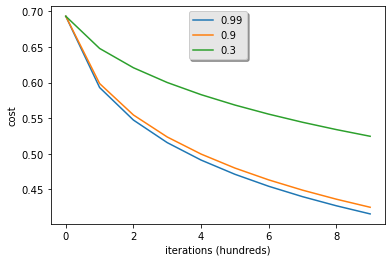

In [15]:
learning_rates = [0.99, 0.9, 0.3]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(X_train, y_train, X_test, y_test, num_iterations=100, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (dozens)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [16]:
logistic_regression_model = model(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.99, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.592964
Cost after iteration 20: 0.547276
Cost after iteration 30: 0.515555
Cost after iteration 40: 0.491070
Cost after iteration 50: 0.471094
Cost after iteration 60: 0.454228
Cost after iteration 70: 0.439649
Cost after iteration 80: 0.426826
Cost after iteration 90: 0.415397
Cost after iteration 100: 0.405102
Cost after iteration 110: 0.395748
Cost after iteration 120: 0.387188
Cost after iteration 130: 0.379306
Cost after iteration 140: 0.372010
Cost after iteration 150: 0.365226
Cost after iteration 160: 0.358892
Cost after iteration 170: 0.352957


c:\Users\xuydo\Desktop\My Cloud\GSI\Aprendizagem\Projeto\Models\LogisticRegressionWith1NN.py:8: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


Cost after iteration 180: 0.347378
Cost after iteration 190: 0.342119
Cost after iteration 200: 0.337148
Cost after iteration 210: 0.332438
Cost after iteration 220: 0.327966
Cost after iteration 230: 0.323712
Cost after iteration 240: 0.319656
Cost after iteration 250: 0.315784
Cost after iteration 260: 0.312080
Cost after iteration 270: 0.308534
Cost after iteration 280: 0.305132
Cost after iteration 290: 0.301866
Cost after iteration 300: 0.298726
Cost after iteration 310: 0.295704
Cost after iteration 320: 0.292791
Cost after iteration 330: 0.289982
Cost after iteration 340: 0.287270
Cost after iteration 350: 0.284650
Cost after iteration 360: 0.282115
Cost after iteration 370: 0.279661
Cost after iteration 380: 0.277285
Cost after iteration 390: 0.274980
Cost after iteration 400: 0.272745
Cost after iteration 410: 0.270575
Cost after iteration 420: 0.268467
Cost after iteration 430: 0.266417
Cost after iteration 440: 0.264424
Cost after iteration 450: 0.262485
Cost after iteration

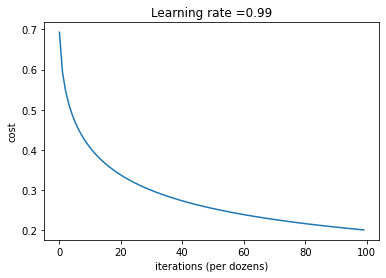

In [19]:

# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per dozens)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()